#🧪 Etapa INICIAL: Abrir e visualizar os dados

In [41]:
import pandas as pd

# Carregar o novo dataset
path = '/content/alzheimers_disease_data.csv'  # Caminho do seu arquivo
df = pd.read_csv(path)

# Verificar as primeiras linhas
print(df.head())

# Verificar informações gerais
print(df.info())

# Verificar se há valores ausentes
print(df.isnull().sum())

   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0     

#📋 Análise do novo dataset
✅ 2149 registros (linhas)

✅ 35 colunas (atributos)

✅ Nenhum valor nulo (ótimo, não precisa se preocupar com limpeza nesse ponto)

🎯 A variável alvo que queremos prever é Diagnosis:

Provavelmente:

0 = Não tem Alzheimer

1 = Tem Alzheimer

🗂️ As colunas são majoritariamente:

Numéricas (int64 e float64)

1 coluna textual: DoctorInCharge (object) → vamos ignorar essa coluna (não tem utilidade para o modelo)

🎛️ Algumas variáveis são sim/não (tipo Smoking, Diabetes, FamilyHistoryAlzheimers...)

# ✅Etapa 2: prepararando os dados para o *modelo*

In [49]:
# Remover colunas inúteis
df = df.drop(columns=["PatientID", "DoctorInCharge"]) #Colunas que não ajuda a prever Alzheimer

# Separar entrada e alvo
target = "Diagnosis"  #define que o que queremos prever é a coluna Diagnosis
X = df.drop(columns=[target])  # cria um novo dataframe X com todas as colunas menos a Diagnosis (ou seja, as variáveis de entrada).
y = df[target]  #separa a coluna Diagnosis como o rótulo/alvo (0 = não tem Alzheimer, 1 = tem Alzheimer).


#🔢 Etapa 3. Separar em treino e teste

##🧠 Por que separamos em treino e teste?
Porque queremos saber se nosso modelo realmente aprendeu a generalizar, ou só decorou os dados que viu.

Imagine o seguinte:

Você dá um monte de exercícios pro seu aluno estudar...
Depois, aplica uma prova com os mesmos exercícios.
Ele tira 10.
Mas... será que ele aprendeu ou só decorou?

É isso que acontece se a gente testa o modelo nos mesmos dados que usou pra treinar: ele pode ir bem só porque já viu as respostas.

##✅ Separar treino e teste permite:
Treinar o modelo em um pedaço dos dados

Avaliar o desempenho em dados "novos" que ele nunca viu

Isso mostra se o modelo realmente aprendeu algo útil e consegue generalizar

##📊 Exemplo simples:
Se você tem 1.000 pacientes:

800 vão pro treinamento (X_train, y_train)

200 vão pro teste (X_test, y_test)

Você treina o modelo só com os 800
E avalia com os 200 que ele nunca viu

##🧪 Por que isso importa?
Se o modelo for ótimo no treino, mas ruim no teste, isso indica:

Ele decorou os dados (overfitting)

Não consegue generalizar pra novos casos

##📌 random_state=42: o que é isso?
Isso é só uma “semente aleatória” — serve pra que a separação aconteça da mesma forma toda vez que você rodar o código.
Isso garante que seus resultados sejam reprodutíveis.





In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,              # X = features, y = rótulo (alvo)
    test_size=0.2,     # 20% dos dados vão pro teste
    random_state=42    # pra garantir que a divisão seja sempre igual (reprodutível)
)

#🚀 Agora com os dados prontos (codificados, divididos e organizados), a gente pode seguir para o treinamento com PyTorch.

#🔢 Etapa 4: Normalizar os dados
##A normalização ajuda bastante o modelo a convergir. Vamos aplicar a padronização (Z-score):

##🎯 O que é normalização/padronização de dados?
É o processo de transformar os valores numéricos para que fiquem na mesma escala.

##📉 Exemplo:
Suponha que você tem essas duas features:

Idade	                      50 a 90 anos

Nível de estresse          	0 a 10

Sem normalização:

A idade domina a entrada (valores grandes)

O modelo dá mais importância pra ela só por causa da escala, não necessariamente porque ela é mais relevante.

##🧠 Por que isso atrapalha?
Modelos como a regressão logística e redes neurais usam gradientes e distâncias internas (em espaços vetoriais). Se uma variável tem valores muito maiores que as outras, ela pode:

"Puxar" o gradiente todo pra ela

Causar convergência lenta

Gerar instabilidade numérica

Fazer o modelo aprender "torto"

.

##🧮 O que é Z-score (padronização)?
Z-score é uma forma de transformar qualquer número em uma escala padrão, baseada na distância que ele está da média, em unidades de desvio padrão.

##📊 Exemplo da vida real:
Imagine que temos as idades de 5 pessoas: [20, 25, 30, 35, 40]

A média (μ) é 30, e o desvio padrão (σ) é cerca de 7.07

Agora vamos calcular o Z-score da idade 40:

(40-30)/7.03 = 1.41

Ou seja:

A idade 40 está 1.41 desvios padrão acima da média.

##🧠 Uma analogia simples:
Pensa que você tem notas de alunos em disciplinas diferentes:

Matemática: 0 a 100

Educação Física: 0 a 10

Música: 0 a 5

Como comparar o desempenho em disciplinas com escalas diferentes? Não dá, né?

Mas se você transformar todas em Z-score, aí sim você consegue saber:

Em qual matéria a pessoa está mais acima ou abaixo da média

Mesmo que as escalas sejam diferentes!

##⚠️ E se não padronizar?
O modelo vai achar que "idade" é mais importante só porque tem números maiores, por exemplo:

Idade: 70

Estresse: 3

Sem padronização, parece que "idade" importa mais — mas isso pode ser falso.

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #Calcula a média e desvio padrão e Aplica a padronização no X_train
X_test = scaler.transform(X_test) #Usa a mesma média e desvio do treino para transformar o teste


#🔁 Etapa 5: Transformar em Tensores PyTorch
Agora transformamos os dados em tensores para usar no modelo:

##📦 Resumo da missão aqui:
O objetivo dessa etapa é pegar os dados do pandas e deixar no formato que o PyTorch entende, que são os tensores.
Depois, a gente organiza esses dados em batches (lotes), pra alimentar o modelo aos poucos durante o treinamento.

##🧱 1. O que são Tensores?
Um tensor é basicamente a forma como o PyTorch representa os dados. Ele é parecido com:

Vetor → 1D

Matriz → 2D

Tensor → pode ser 3D, 4D, etc.

##🧠 Analogia simples:
Imagina que você tem uma pilha de cartas com perguntas e respostas (se a pessoa tem Alzheimer ou não).
O TensorDataset junta a pergunta e a resposta.
O DataLoader pega 32 cartas por vez e entrega pro modelo estudar.

##🧮 Imagine esses dados simples:
Suponha que você tem 3 pacientes com 2 atributos cada (ex: idade e IMC) e um diagnóstico (y) de Alzheimer:

       X = [[65, 25.0],
            [70, 30.5],
            [80, 28.1]]

        y = [0, 1, 1]  # 0 = sem Alzheimer, 1 = com Alzheimer

🔹 Antes do unsqueeze
y é um vetor 1D: [0, 1, 1]
O modelo espera algo assim (2D): [[0],
 [1],
 [1]]

É aqui que entra: y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

🔹 Resultado da transformação

        y_tensor =
        tensor([[0.],
                [1.],
                [1.]])

🔹 Criando o TensorDataset

dataset = TensorDataset(X_tensor, y_tensor)

Isso transforma os dados em pares:

         [(X[0], y[0]),
         (X[1], y[1]),
         (X[2], y[2])]

 🔄 Agora o DataLoader em ação

 loader = DataLoader(dataset, batch_size=2, shuffle=False)

 O loader vai entregar os dados assim:

     Primeira rodada:
     X = [[65.0, 25.0],
          [70.0, 30.5]]

     y = [[0.],
          [1.]]

     Segunda rodada:
     X = [[80.0, 28.1]]
     y = [[1.]]


##🧠 Benefícios:
✅ Evita estourar memória (quando o dataset é grande)
✅ Deixa o treinamento mais estável
✅ Permite embaralhar os dados a cada época → ajuda o modelo a aprender melhor



In [52]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Converter para tensores
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  #torch.tensor(...)	Converte arrays NumPy em tensores
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1) #.unsqueeze(1)	Transforma vetor em coluna (pra bater com o que o modelo espera)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Criar DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor) #Isso junta X e y — tipo um par ordenado de entrada e saída: [(x₁, y₁), (x₂, y₂), ..., (xn, yn)]
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True) #Divide os dados em mini-lotes de 32 amostras (ao invés de passar tudo de uma vez)
test_loader = DataLoader(test_dataset, batch_size=32)  #Embaralha os dados antes de cada época de treino (shuffle=True), o que ajuda o modelo a generalizar melhor

#🧠 Etapa 6.1: Criar o modelo de Regressão Logística
Usamos o nn.Module do PyTorch para definir o modelo. Ele vai ter:

Uma única camada linear (porque é um problema de classificação binária)

Uma função sigmoide pra gerar probabilidades

##🧠 MAS O que é Regressão Logística?
Apesar do nome “regressão”, ela é um modelo de classificação, mais especificamente de classificação binária.

##👉 Problemas típicos que ela resolve:
Essa pessoa tem Alzheimer ou não?

Esse cliente vai cancelar a assinatura ou não?

Esse e-mail é spam ou não?

Ou seja, a saída final é sempre 0 ou 1.

##🔢 Mas por que “logística”?
Porque o modelo usa a função logística (também conhecida como sigmoide) para transformar a saída da equação linear em uma probabilidade entre 0 e 1.

Vamos imaginar passo a passo:
📥 Você tem várias variáveis de entrada (ex: idade, IMC, estresse etc.)

🧮 O modelo faz uma soma ponderada com pesos:

        z = w1x1 + w2x2 + .... + b

➡️ Essa soma (que pode ser qualquer número, tipo -5 ou +8) é passada por uma função sigmoide:

        sigmoid(z)= (FORMULA DA SIGMOIDE)
          

🎯 O resultado vira uma probabilidade entre 0 e 1.

✅ Se for maior que 0.5 → modelo diz “é 1” (tem Alzheimer) ❌ Se for menor que 0.5 → modelo diz “é 0” (não tem)

##🧪 Exemplo prático:
Imagina esse caso:

    Idade = 80
    IMC = 30.5
    Histórico familiar = Sim

Se o modelo calcular:

    z = 3.0
    sigmoid(z) ≈ 0.95

Isso significa: "95% de chance de ter Alzheimer"
→ Modelo classifica como 1 (tem Alzheimer)

Etapa	O que acontece
Entrada (X)	Idade, IMC, etc.

Soma linear	z = wX + b

Função logística	sigmoid(z) vira probabilidade

Classificação	prob > 0.5 → classe 1, senão classe 0

In [53]:
import torch.nn as nn

class LogisticRegressionModel(nn.Module): #Definindo a estrutura do modelo. nn.Module é só a "base" do PyTorch pra todos os modelos. Ele te dá várias funções úteis por trás dos panos.
    def __init__(self, input_dim): #Esse é o construtor da classe. Ele recebe input_dim = número de entradas do modelo (número de colunas do seu dataset).
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1) #Aqui você cria a camada linear:  z=w1x1+w2x2+...+b  input_dim: número de variáveis de entrada (ex: idade, estresse, IMC...) e o 1 é porque você quer uma única saída (probabilidade de ter Alzheimer)
        self.sigmoid = nn.Sigmoid() #Essa é a função logística (sigmoide), que vai transformar a saída do z (que pode ser qualquer número) em uma probabilidade entre 0 e 1.

    def forward(self, x):  #Essa função diz como os dados passam pelo modelo.
        out = self.linear(x)  #Aplicar a camada linear
        out = self.sigmoid(out) #Aplicar a sigmoide
        return out

# Instanciar o modelo
input_dim = X_train.shape[1] #Aqui você calcula quantas features seu modelo vai receber (quantas colunas tem no X_train)
model = LogisticRegressionModel(input_dim) #Aqui você instancia o modelo com o número certo de entradas.

#⚙️ Etapa 6.2: Função de perda e otimizador
Como estamos fazendo classificação binária, vamos usar a função de perda BCELoss (Binary Cross Entropy) e o otimizador SGD (gradiente descendente estocástico).

##🎯 Primeira coisa: O que é uma função de perda (loss function)?
A função de perda é uma maneira de medir o erro do modelo.

Ou seja:

Depois de uma previsão, quanto o modelo errou em relação ao valor real?

Se ele acertou → perda pequena (quase zero)

Se ele errou feio → perda grande

A perda é usada para orientar o modelo sobre como ajustar os pesos (o "w" e "b") e melhorar nas próximas tentativas.

##📏 O que é BCELoss (Binary Cross Entropy)?
Como estamos em classificação binária (Alzheimer ou não Alzheimer), a função de perda adequada é a Entropia Cruzada Binária.

A fórmula dela é:

       BCELoss=−[y⋅log(p)+(1−y)⋅log(1−p)]

Onde:

y é o valor real (0 ou 1)
p é a probabilidade prevista (entre 0 e 1)

##💡 Intuição simples:
Se o valor real é 1 e o modelo previu uma probabilidade perto de 1 → perda pequena (bom!)

Se o valor real é 0 e o modelo previu uma probabilidade perto de 0 → perda pequena (bom!)

Se o valor real é 1 e o modelo previu 0.1 → perda grande (ruim!)

Se o valor real é 0 e o modelo previu 0.9 → perda grande (ruim!)

##🔥 E o que é o otimizador?
O otimizador é o "mecanismo" que ajusta os pesos do modelo para minimizar a perda.

Ele responde:

"Beleza, o modelo errou, agora como ajustamos os pesos para errar menos?"

##⚙️ O que é SGD (Stochastic Gradient Descent)?
SGD é o otimizador mais simples e clássico:

Ele calcula o gradiente (a direção onde a perda diminui mais rápido)

Dá pequenos passos nessa direção para ajustar os pesos

"Stochastic" porque ele atualiza usando pequenos grupos de dados (batches) em vez do dataset inteiro

In [54]:
import torch.optim as optim

# Função de perda
criterion = nn.BCELoss() #criterion é a função que vai calcular quanto o modelo errou para cada previsão.

# Otimizador
optimizer = optim.SGD(model.parameters(), lr=0.01) #optimizer é quem ajusta os pesos do modelo para tentar reduzir o erro.
                                                    #model.parameters(): passa todos os pesos e bias do seu modelo
                                                    #lr=0.01: é a learning rate (taxa de aprendizado) → controla o tamanho dos passos na atualização



#🔁 Etapa 6.3: Treinar o modelo
Vamos iterar sobre os dados por algumas épocas, calcular a perda (loss), fazer a retropropagação e atualizar os pesos. Aqui está um código simples para isso:

##🔥 Qual é a ideia geral aqui?
Treinar o modelo significa:

"Mostre exemplos pro modelo → veja o quanto ele erra → ajuste os pesos pra errar menos → repita esse ciclo várias vezes."

Esse processo de repetição chama-se ÉPOCAS.

In [56]:
# Treinar o modelo
n_epochs = 100 #Número de épocas definido como 100, onde 1 época = o modelo viu todo o conjunto de treino 1 vez.

for epoch in range(n_epochs): #Faz o processo de treino 100 vezes (ou o número que você definiu em n_epochs).
    model.train() # Colocar o modelo em modo treinamento (é importante pra coisas como Dropout ou BatchNorm, se existirem no modelo).
    running_loss = 0.0 #Inicializar o erro acumulado da época, Começa a loss da época em 0, e vai somando ao longo da época.

    for inputs, labels in train_loader: #Pegar mini-lotes do treino. Cada inputs tem um pequeno pedaço dos dados (batch), e labels são os rótulos correspondentes (0 ou 1).

        # Zerar os gradientes anteriores
        optimizer.zero_grad() #No PyTorch, os gradientes são acumulativos por padrão, então sempre zeramos

        # Forward pass
        outputs = model(inputs) #Faz a previsão para esse mini-lote de dados.

        # Calcular perda
        loss = criterion(outputs, labels) #Compara a previsão (outputs) com o valor real (labels) usando a função BCELoss.

        # Backward pass
        loss.backward() #Calcula o gradiente da perda em relação aos pesos — ou seja, quanto e para onde cada peso deveria mudar pra reduzir o erro.

        # Atualizar pesos
        optimizer.step() # Usa o otimizador (SGD) pra atualizar os pesos usando os gradientes calculados.

        running_loss += loss.item() #Vai somando a perda de cada mini-lote pra calcular a perda média da época.

    # Mostrar a loss média da época
    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"Época {epoch+1}/{n_epochs}, Loss: {running_loss/len(train_loader):.4f}") # A cada 10 épocas (e na primeira), imprime a perda média.
                                                                                         #Assim você acompanha se o modelo está melhorando (a perda deve diminuir).


Época 1/100, Loss: 0.3767
Época 10/100, Loss: 0.3732
Época 20/100, Loss: 0.3694
Época 30/100, Loss: 0.3677
Época 40/100, Loss: 0.3672
Época 50/100, Loss: 0.3661
Época 60/100, Loss: 0.3653
Época 70/100, Loss: 0.3650
Época 80/100, Loss: 0.3660
Época 90/100, Loss: 0.3643
Época 100/100, Loss: 0.3650



#📊 Etapa 7: Avaliar o modelo
Agora vamos ver como ele se saiu nos dados de teste. A gente vai calcular:

Acurácia

Precisão

Recall

F1-score

E também uma matriz de confusão


##🎯 O que é "avaliar o modelo"?
Depois que o modelo foi treinado, a gente quer saber:

Ele é bom ou ruim?

Ele acerta bastante?

Quando erra, como ele erra?

Pra responder isso, usamos métricas de avaliação.
Não basta só olhar se a loss ficou pequena no treino — a gente precisa ver como o modelo se comporta com dados novos (teste).

##📏 As 4 métricas que você está calculando:
1️⃣ Acurácia
Proporção de vezes que o modelo acertou, considerando todos os casos.

Fórmula:

        acuracia = Total de acertos / total de previsões

🔵 Exemplo:

Você previu 80 casos corretamente de 100 → 80% de acurácia.

🧠 Cuidado: se os dados tiverem muito mais "não doente" que "doente", a acurácia pode ser enganosa!

##2️⃣ Precisão
Das vezes que o modelo disse "tem Alzheimer", quantas vezes ele estava certo?

Fórmula:

        precisão = verdadeiros positivos / (verdadeiros positivos + falsos positivos)
​

🔵 Exemplo:

O modelo previu "Alzheimer" para 10 pessoas, mas só 7 realmente tinham → Precisão = 70%.

🧠 Importância: boa quando você quer evitar falsos alarmes (não acusar doença onde não tem).

##3️⃣ Recall
Das pessoas que realmente tinham Alzheimer, quantas o modelo conseguiu encontrar?

Fórmula:

      Recall = verdadeiros positivos / (verdadeiros positivos + falsos negativos)

🔵 Exemplo:

Existem 100 doentes, mas o modelo só detectou 80 → Recall = 80%.

🧠 Importância: boa quando você não quer deixar passar casos reais (evitar esquecer de diagnosticar quem precisa).

##4️⃣ F1-Score
Uma média equilibrada entre Precisão e Recall.

Fórmula:

      F1 = 2 * ((precisão * recall)/(presisão + recall))

🔵 Exemplo:

Se Precisão = 70% e Recall = 80%, o F1 vai ficar entre eles (tipo 74%).

🧠 Importância: útil quando os dados estão desbalanceados e você quer equilibrar o foco entre acertar positivos e lembrar de todos.

##🧩 E a Matriz de Confusão?
Essa é uma tabela que mostra exatamente onde o modelo acertou e onde errou:

TN: acertou que não tinha Alzheimer

TP: acertou que tinha Alzheimer

FP: disse que tinha Alzheimer, mas não tinha

FN: disse que não tinha Alzheimer, mas tinha

🧠 Um exemplo pequeno de tudo isso junto:
Imagine 10 pacientes:

6 não têm Alzheimer

4 têm Alzheimer

E o modelo previu:


          Paciente	Real	Predito
          1	         0	     0
          2	         0	     0
          3        	 0	     1
          4	         0	     0
          5	         0	     0
          6	         0	     0
          7	         1	     1
          8	         1	     1
          9	         1	     0
          10	        1	     1

Então:

TN = 5 (5 acertos de "não tem")

FP = 1 (falso positivo)

TP = 3 (acertos de "tem")

FN = 1 (falso negativo)

Aí:

Acurácia = (5 + 3) / 10 = 80%

Precisão = 3 / (3 + 1) = 75%

Recall = 3 / (3 + 1) = 75%

F1-score ≈ 75%


#📌 Código para avaliação:

In [59]:
#Funções da biblioteca sklearn para calcular as métricas (acurácia, precisão, recall, F1, matriz de confusão).
#numpy para poder manipular arrays (porque sklearn trabalha com numpy, e não com tensores do PyTorch).
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix #
import numpy as np

# Colocar o modelo em modo avaliação
model.eval()  #Quando você chama model.eval(), você diz: "Modelo, agora você não precisa mais treinar, só prever! "

# Fazer previsões no conjunto de teste
with torch.no_grad(): #Desligar o cálculo de gradientes, Isso economiza memória e acelera a execução. Além de que não faz sentido calcular o gradiente na avaliação
    y_pred_probs = model(X_test_tensor) #Você manda o X_test_tensor (seus dados de teste) pro modelo. O modelo responde com probabilidades de cada exemplo ser 1 (Alzheimer).
    y_pred = (y_pred_probs >= 0.5).float() #Transformar probabilidades em 0 ou 1, Se a probabilidade for maior ou igual a 0.5, a previsão é 1 (Alzheimer).
                                           #Se for menor que 0.5, a previsão é 0 (Não tem Alzheimer).

# Converter para numpy, pois sklearn exige que as entradas sejam arrays NumPy.
y_true_np = y_test_tensor.numpy() #transforma as respostas reais (y_test_tensor)em NumPy Arrays.
y_pred_np = y_pred.numpy() #transforma as respostas previstas (y_pred) em NumPy Arrays.

# Calcular métricas
acc = accuracy_score(y_true_np, y_pred_np)   #Percentual de acertos totais
prec = precision_score(y_true_np, y_pred_np) #Das vezes que o modelo disse que era Alzheimer, quantas vezes estava certo
rec = recall_score(y_true_np, y_pred_np)     #Das pessoas que realmente tinham Alzheimer, quantas o modelo detectou
f1 = f1_score(y_true_np, y_pred_np)          #Média harmônica entre precisão e recall (equilíbrio)
cm = confusion_matrix(y_true_np, y_pred_np)  #Matriz que mostra os acertos e erros divididos por tipo

print(f"Acurácia: {acc:.4f}")
print(f"Precisão: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Matriz de Confusão:")
print(cm)


Acurácia: 0.8302
Precisão: 0.7899
Recall: 0.7124
F1-Score: 0.7491
Matriz de Confusão:
[[248  29]
 [ 44 109]]


##✅ Acurácia: 83,0%
O modelo acerta 83,0% dos casos totais — isso inclui quem tem e quem não tem Alzheimer.

⚠️ Lembre-se: se as classes forem desbalanceadas (muito mais casos de um lado), a acurácia sozinha pode ser um pouco enganosa.

##📍 Precisão: 78,9%
Das pessoas que o modelo previu que têm Alzheimer, 78,9% realmente têm.

Alta precisão é importante quando queremos evitar falsos positivos — ou seja, não acusar alguém de ter Alzheimer quando na verdade não tem.


##📍 Recall: 71,2%
Das pessoas que realmente têm Alzheimer, o modelo conseguiu identificar 71,2% delas.

Alto recall é importante para não deixar passar casos verdadeiros — queremos identificar o máximo possível de pacientes que realmente têm a doença.

##📍 F1-Score: 74,9%
O F1-score é a média equilibrada entre precisão e recall.
Indica que o modelo tem um bom equilíbrio: ele é razoavelmente bom tanto em acertar quem tem quanto em não errar quem não tem.

##🧮 Matriz de Confusão:
Verdadeiros Negativos (TN): 248 → pessoas sem Alzheimer que foram corretamente classificadas como "não têm".

Falsos Positivos (FP): 29 → pessoas sem Alzheimer que o modelo disse que têm (erro de "falso alarme").

Falsos Negativos (FN): 44 → pessoas com Alzheimer que o modelo não conseguiu detectar (erro preocupante).

Verdadeiros Positivos (TP): 109 → pessoas com Alzheimer corretamente identificadas.

#🎯 1. Matriz de Confusão Visual

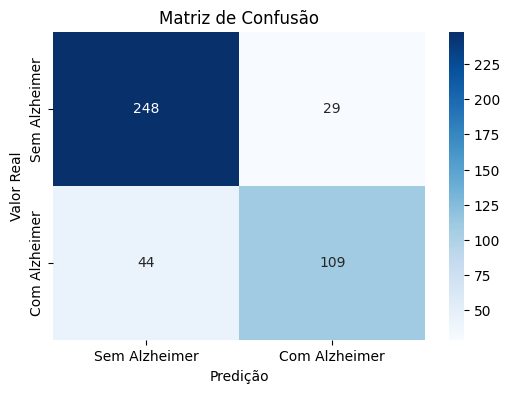

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Sem Alzheimer", "Com Alzheimer"], yticklabels=["Sem Alzheimer", "Com Alzheimer"])
plt.xlabel("Predição")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusão")
plt.show()
